# Billion-Dollar Dreams: India's Startup Saga

##### Nirmal Janapaneedi

## 
In the heart of the world's fastest-growing major economy, a revolution is unfolding. India's startup ecosystem has become a crucible of innovation, ambition, and unprecedented growth. This project delves into the stories of Indian startups that have achieved remarkable feet. From the bustling streets of Bengaluru to the tech hubs of Noida, we'll explore how these companies have turned audacious ideas into billion-dollar realities. Through data-driven analysis, we aim to uncover the patterns, challenges, and triumphs that define India's startup saga, offering insights into the factors that propel young companies from msimple beginnings to the forefront of the global business stage.

## 1. Data Preparation and Setup
### 1.1 Importing Libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


### 1.2 Loading the Dataset

In [2]:
# Load the dataset
df = pd.read_excel('Project Data.xlsx')

print("Dataset imported successfully!")

Dataset imported successfully!


### 1.3 Initial Data Exploration
Now, we will perform a preliminary exploration of the dataset to understand its structure and contents. We will check for missing values, data types, and basic statistics.

In [3]:
# Check the data types and non-null counts
df.info()

# Display starting data values
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    126 non-null    object
 1   State                   126 non-null    object
 2   City                    126 non-null    object
 3   Start Year              126 non-null    int64 
 4   Founder(s)              126 non-null    object
 5   Industry                126 non-null    object
 6   Number of Employees     126 non-null    object
 7   Funding(in $)           126 non-null    object
 8   Funding Rounds          126 non-null    object
 9   Number of Investors     126 non-null    object
 10  Market Valuation(in $)  126 non-null    object
dtypes: int64(1), object(10)
memory usage: 11.0+ KB


,Name,State,City,Start Year,Founder(s),Industry,Number of Employees,Funding(in $),Funding Rounds,Number of Investors,Market Valuation(in $)
0,Urban Company,Haryana,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Service,1001-5000,445920356,12,16,2180000000
1,Classplus,Uttar Pradesh,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...",Education,101-250,89506451,10,20,626000000
2,Paytm,Uttar Pradesh,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",Finance,25000-30000,32448851,4,4,2500000000
3,Apna,Maharashtra,Mumbai,2019,Nirmit Parikh,Human Resource,101-250,93450000,4,6,1100000000
4,Razorpay,Karnataka,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",Finance,1001-5000,366600000,7,29,7500000000


In [4]:
# Display trailing data values
df.tail()

,Name,State,City,Start Year,Founder(s),Industry,Number of Employees,Funding(in $),Funding Rounds,Number of Investors,Market Valuation(in $)
121,Astrogate Labs,Karnataka,Bengaluru,2019,"Nitish Singh, Neha Singh",Communication,51-100,1000000,2,4,10000000
122,Vesta Space,Maharashtra,Pune,2020,"Kranthi Chand, Rajeev Sharma",Space,51-100,500000,1,2,5000000
123,Digantara,Karnataka,Bengaluru,2018,"Anirudh Sharma, Rahul Rawat",Space,51-100,1200000,3,5,8000000
124,SatSure,Karnataka,Bengaluru,2016,"Prateep Basu, Rashmit Singh Sukhmani",Space,101-250,6000000,4,6,50000000
125,Rockinjiny,Tamil Nadu,Chennai,2020,"Vinay Kumar, Sai Praneeth",Space,51-100,500000,1,2,3000000


## 2. Data Cleaning 
Next we will focus on Data Cleaning. This step ensures that the data is in a suitable format for analysis and helps to improve the quality and accuracy of our results.

### 2.1 Checking for Missing Values

In [5]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the number of missing values for each column
missing_values


Name                      0
State                     0
City                      0
Start Year                0
Founder(s)                0
Industry                  0
Number of Employees       0
Funding(in $)             0
Funding Rounds            0
Number of Investors       0
Market Valuation(in $)    0
dtype: int64

Depending on the results, we handle missing values. We might choose to fill them with a default value, the mean/median, or remove rows/columns with missing data.

### 2.2 Data Type Conversion
Ensure that columns are in the correct format

In [6]:
# Convert 'Funding(in $)' to numeric, invalid parsing will be set as NaN
df['Funding(in $)'] = pd.to_numeric(df['Funding(in $)'].replace({',': ''}, regex=True), errors='coerce')

# Convert 'Market Valuation(in $)' to numeric, invalid parsing will be set as NaN
df['Market Valuation(in $)'] = pd.to_numeric(df['Market Valuation(in $)'].replace({',': ''}, regex=True), errors='coerce')

# Check for NaN values in 'Funding(in $)' and 'Market Valuation(in $)'
nan_funding = df[df['Funding(in $)'].isna()]
nan_valuation = df[df['Market Valuation(in $)'].isna()]

# Display NaN values
print("Rows with NaN values in Funding(in $):")
print(nan_funding)

print("\nRows with NaN values in Market Valuation(in $):")
print(nan_valuation)

# Drop rows with NaN values in 'Funding(in $)' or 'Market Valuation(in $)'
df.dropna(subset=['Funding(in $)', 'Market Valuation(in $)'], inplace=True)

# Verify data types
df.dtypes

# Display the first few rows to ensure correct conversion
df.head()


Rows with NaN values in Funding(in $):
                  Name        State    City  Start Year  Founder(s)  \
89  StartupHR Software  Maharashtra  Mumbai        2021  Waqar Azmi   

             Industry Number of Employees  Funding(in $) Funding Rounds  \
89  Internet Software             101-250            NaN   Bootstrapped   

   Number of Investors  Market Valuation(in $)  
89                   -                     NaN  

Rows with NaN values in Market Valuation(in $):
                  Name        State       City  Start Year  \
8            BigBasket    Karnataka  Bengaluru        2011   
89  StartupHR Software  Maharashtra     Mumbai        2021   

                                           Founder(s)           Industry  \
8   Abhinay Choudhari, Hari Menon, Vipul Parekh, V...         E-Commerce   
89                                         Waqar Azmi  Internet Software   

   Number of Employees  Funding(in $) Funding Rounds Number of Investors  \
8           5001-10000   1.1

,Name,State,City,Start Year,Founder(s),Industry,Number of Employees,Funding(in $),Funding Rounds,Number of Investors,Market Valuation(in $)
0,Urban Company,Haryana,Gurgaon,2014,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan",Service,1001-5000,445920356.0,12,16,2.180000e+09
1,Classplus,Uttar Pradesh,Noida,2018,"Bhaswat Agarwal, Bikash Dash, Mukul Rustagi, N...",Education,101-250,89506451.0,10,20,6.260000e+08
2,Paytm,Uttar Pradesh,Noida,2010,"Akshay Khanna, Vijay Shekhar Sharma",Finance,25000-30000,32448851.0,4,4,2.500000e+09
3,Apna,Maharashtra,Mumbai,2019,Nirmit Parikh,Human Resource,101-250,93450000.0,4,6,1.100000e+09
4,Razorpay,Karnataka,Bengaluru,2014,"Harshil Mathur, Shashank Kumar",Finance,1001-5000,366600000.0,7,29,7.500000e+09


## 3. Data Analysis & Interpretation
In this part, we will try to understand valuable insights from the data by asking numerous questions. Finding solutions for those questions with the help of visualizations and data interpretation techniques, thereby, we will be able to understand our data set and analyze effectively.

### 3.1 Distribution of Startups across different states and cities in India
3.1.1 Barplot of startups by state

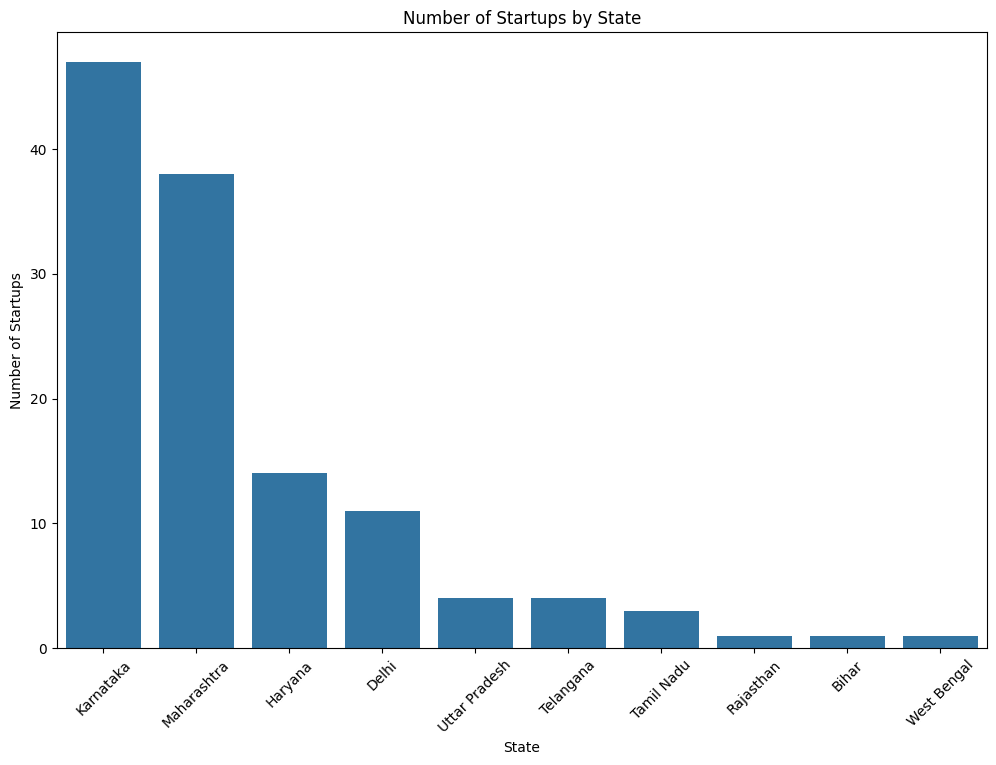

In [7]:
# Count startups by state
state_counts = df['State'].value_counts()

# Count startups by city
city_counts = df['City'].value_counts()

# Bar plot of startups by state
plt.figure(figsize=(12, 8))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('Number of Startups by State')
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()


3.1.2 Bar plot of startups by city (top 5 cities)

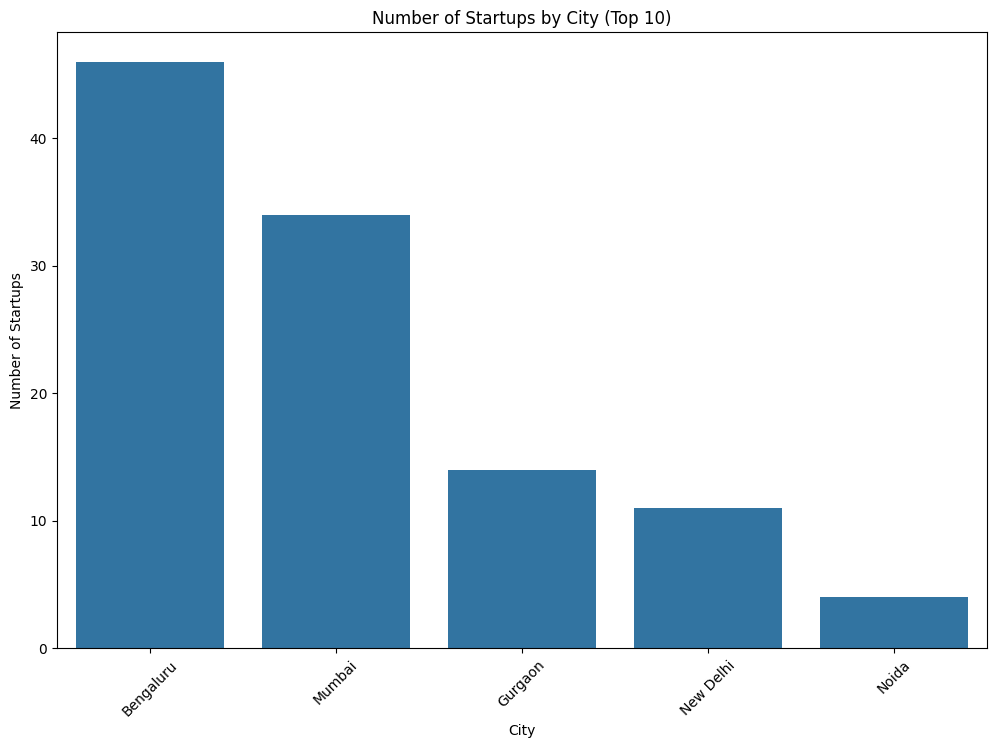

In [8]:
# Bar plot of startups by city (top 5 cities)
top_cities = city_counts.head(5)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Number of Startups by City (Top 10)')
plt.xlabel('City')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()


3.1.3 
Let's compare startups in South India and North India

States considered as a part of South India - [Karnataka, Andhra Pradesh, Telangana, Kerala, Tamil Nadu, Maharashtra]

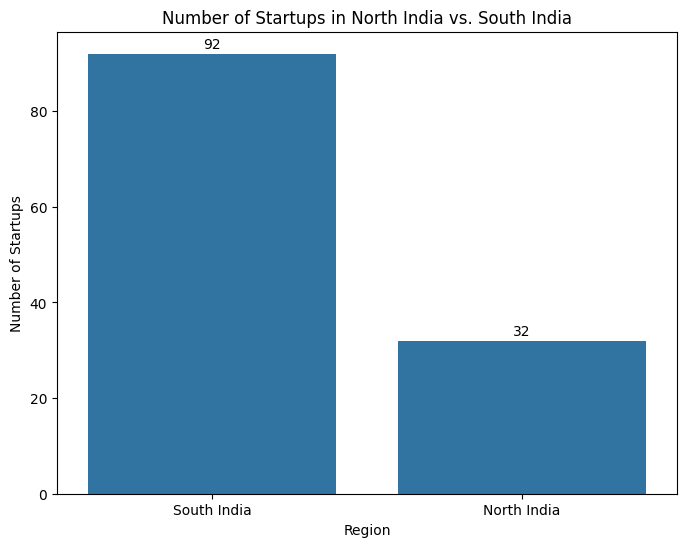

In [9]:
# Define the states in South India
south_india_states = ['Karnataka', 'Andhra Pradesh', 'Telangana', 'Kerala', 'Tamil Nadu', 'Maharashtra']

# Create a new column 'Region' to categorize as 'South India' or 'North India'
df['Region'] = df['State'].apply(lambda x: 'South India' if x in south_india_states else 'North India')

# Count startups by region
region_counts = df['Region'].value_counts()

# Plot the number of startups in North India vs. South India with counts
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Number of Startups in North India vs. South India')
plt.xlabel('Region')
plt.ylabel('Number of Startups')

## Add counts on top of the bars
for index, value in enumerate(region_counts.values):
    ax.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

3.1.4 Deeper analysis to understand the state-wise south indian startups.

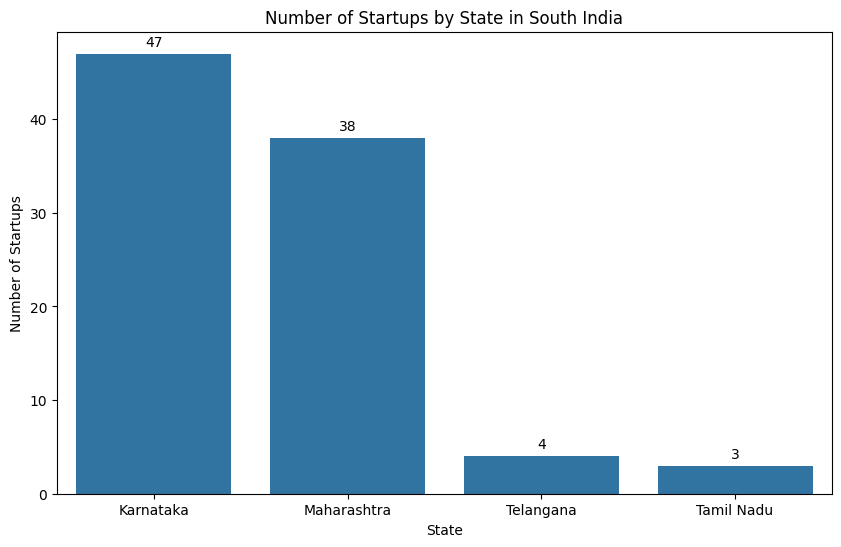

In [10]:
# Filter the dataset for South Indian states
south_india_df = df[df['Region'] == 'South India']

# Count startups by state in South India
south_india_state_counts = south_india_df['State'].value_counts()

# Plot the number of startups by state in South India
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=south_india_state_counts.index, y=south_india_state_counts.values)
plt.title('Number of Startups by State in South India')
plt.xlabel('State')
plt.ylabel('Number of Startups')

# Add counts on top of the bars
for index, value in enumerate(south_india_state_counts.values):
    ax.text(index, value + 0.5, str(value), ha='center', va='bottom')

plt.show()

## 3.2 Industrial patterns in the startup ecosystem in India
3.2.1 Barplot of most common industries in which startups are rising in India.

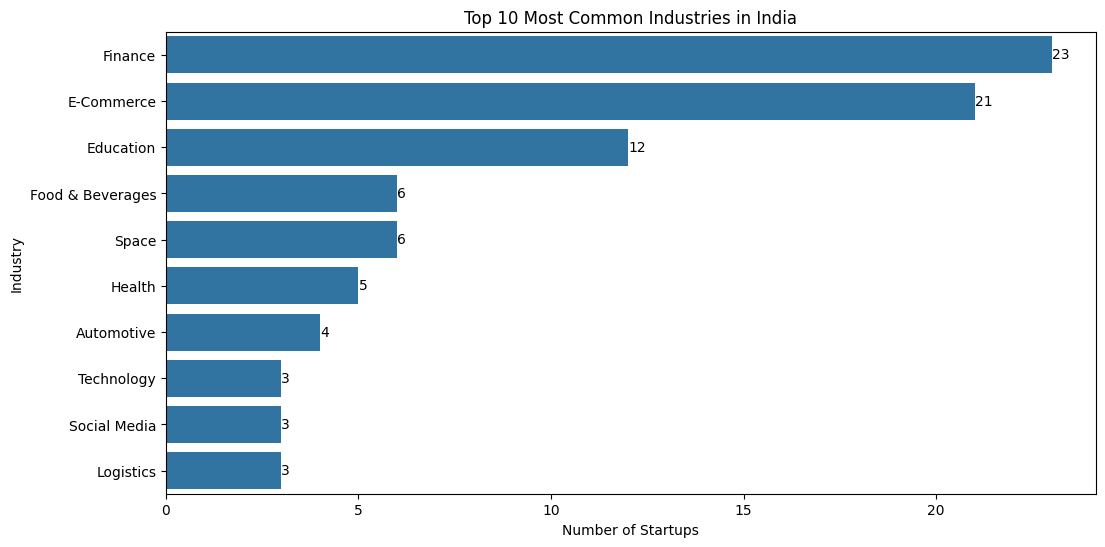

In [11]:
# Count the number of startups in each industry
industry_counts = df['Industry'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index,orient='h')
plt.title('Top 10 Most Common Industries in India')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')

# Add the counts next to the bars
for index, value in enumerate(industry_counts.values):
    plt.text(value, index, str(value), va='center')

plt.show()


3.2.2 Industrial distribution of top south Indian state in terms of number of startups

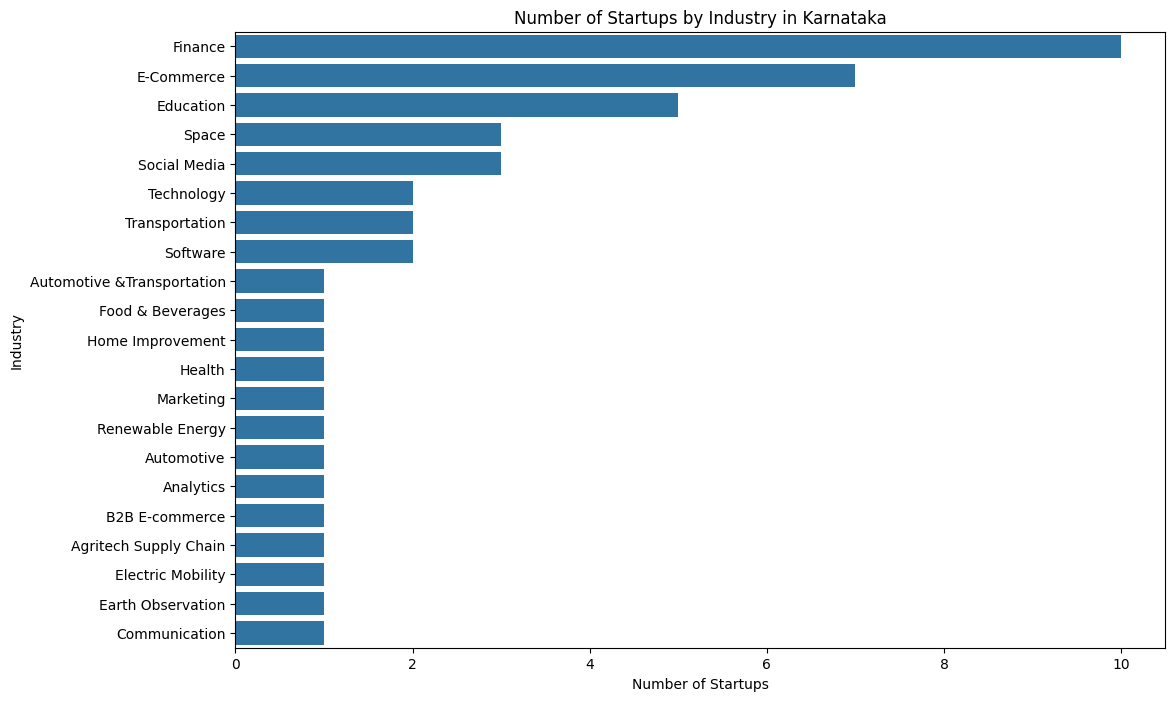

In [12]:
# Determine the top South Indian state by number of startups
top_south_india_state = south_india_df['State'].value_counts().idxmax()

# Filter data for the top South Indian state
top_state_df = south_india_df[south_india_df['State'] == top_south_india_state]

# Count startups by industry within this state
top_state_industry_counts = top_state_df['Industry'].value_counts()

# Plot the number of startups by industry for the top South Indian state
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_state_industry_counts.values, y=top_state_industry_counts.index, orient='h')
plt.title(f'Number of Startups by Industry in {top_south_india_state}')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')
plt.show()

3.2.3 Industrial distribution of top north Indian state in terms of number of startups

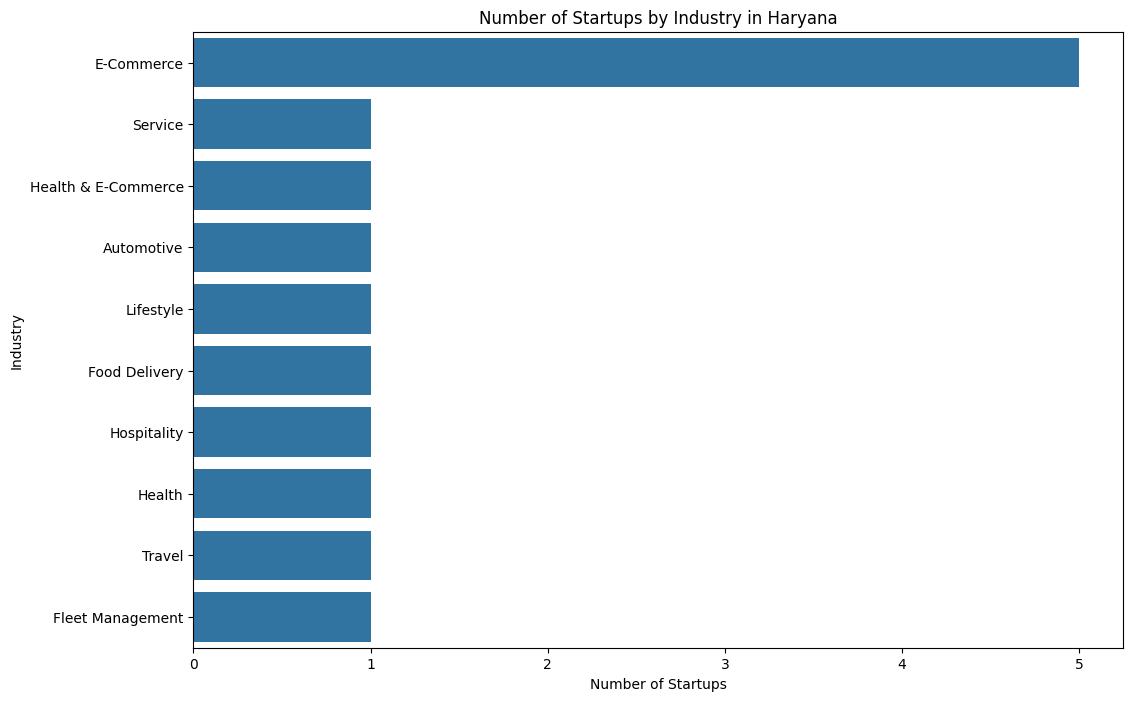

In [13]:
# Filter the dataset for North Indian states
north_india_df = df[df['Region'] == 'North India']

# Count startups by state in North India
north_india_state_counts = north_india_df['State'].value_counts()

# Determine the top North Indian state by number of startups
top_north_india_state = north_india_df['State'].value_counts().idxmax()

# Filter data for the top North Indian state
top_state_df = north_india_df[north_india_df['State'] == top_north_india_state]

# Count startups by industry within this state
top_state_industry_counts = top_state_df['Industry'].value_counts()

# Plot the number of startups by industry for the top South Indian state
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_state_industry_counts.values, y=top_state_industry_counts.index, orient='h')
plt.title(f'Number of Startups by Industry in {top_north_india_state}')
plt.xlabel('Number of Startups')
plt.ylabel('Industry')
plt.show()

3.2.4 Which industries in the indian startup ecosystem are receiving the most funding?

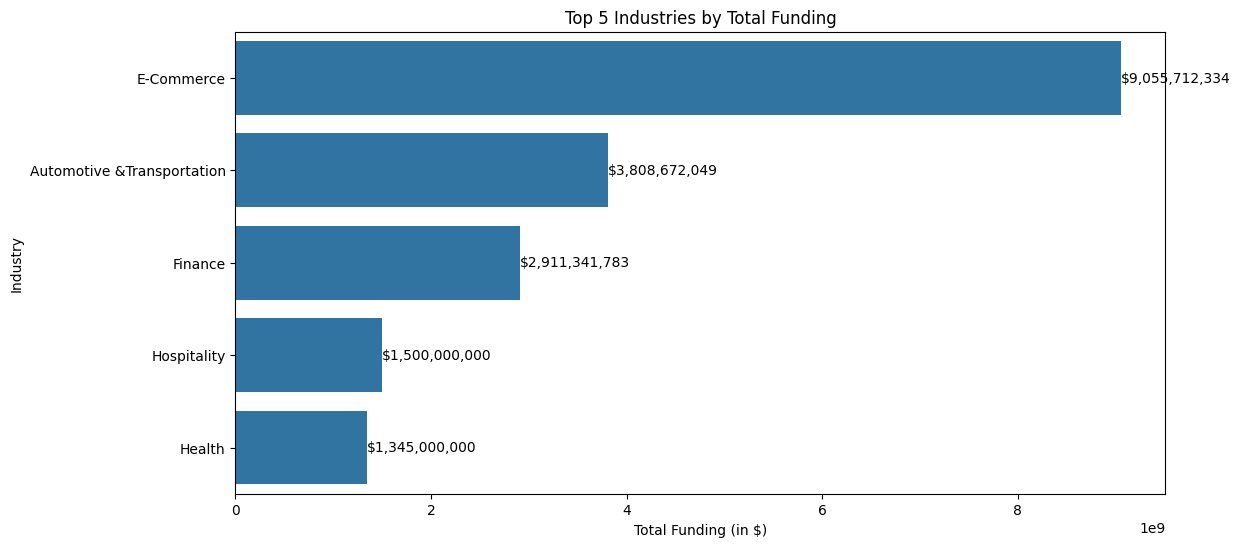

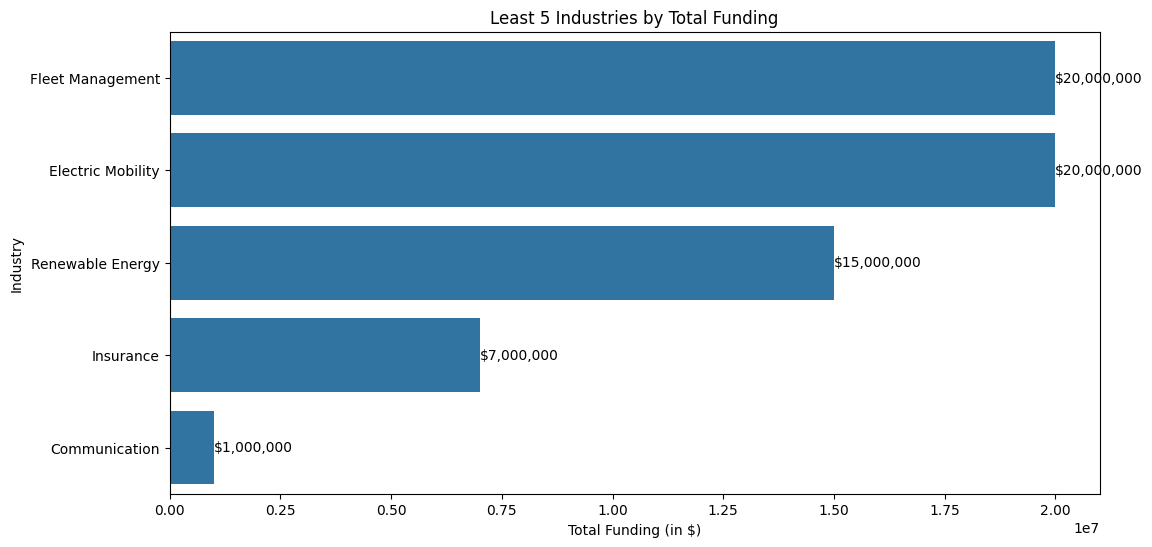

In [14]:
# Define the datasets
top_5_industries = df.groupby('Industry')['Funding(in $)'].sum().sort_values(ascending=False).head(5)
least_5_industries = df.groupby('Industry')['Funding(in $)'].sum().sort_values(ascending=False).tail(5)

## Plotting Top 5 Industries (hue and palette)
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=top_5_industries.values, y=top_5_industries.index, orient='h')
plt.title('Top 5 Industries by Total Funding')
plt.xlabel('Total Funding (in $)')
plt.ylabel('Industry')

# Add funding amounts next to the bars
for index, value in enumerate(top_5_industries.values):
    ax1.text(value, index, f'${value:,.0f}', va='center')

plt.show()

## Plotting Least 5 Industries (hue and palette)
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x=least_5_industries.values, y=least_5_industries.index, orient='h')
plt.title('Least 5 Industries by Total Funding')
plt.xlabel('Total Funding (in $)')
plt.ylabel('Industry')

# Add funding amounts next to the bars
for index, value in enumerate(least_5_industries.values):
    ax2.text(value, index, f'${value:,.0f}', va='center')

plt.show()


3.2.5 How about we find out which industries have billion-dollar or more market valued companies.

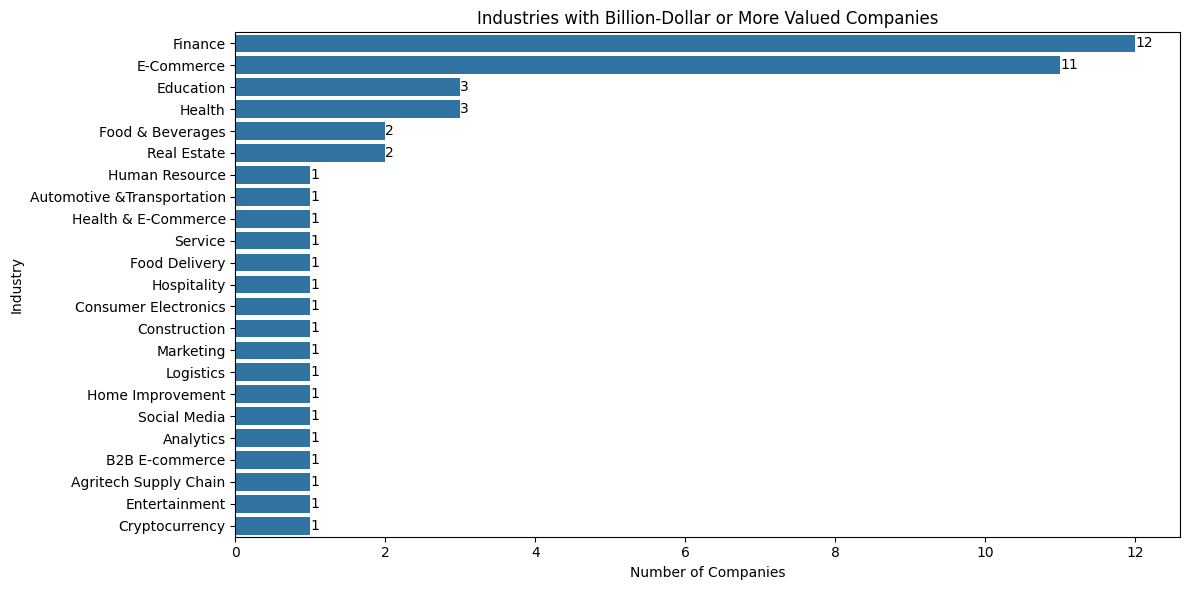

Industries with billion-dollar or more valued companies:
Finance: 12
E-Commerce: 11
Education: 3
Health: 3
Food & Beverages: 2
Real Estate: 2
Human Resource: 1
Automotive &Transportation: 1
Health & E-Commerce: 1
Service: 1
Food Delivery: 1
Hospitality: 1
Consumer Electronics: 1
Construction: 1
Marketing: 1
Logistics: 1
Home Improvement: 1
Social Media: 1
Analytics: 1
B2B E-commerce: 1
Agritech Supply Chain: 1
Entertainment: 1
Cryptocurrency: 1


In [15]:
# Convert Market Valuation to numeric if it's not already
df['Market Valuation(in $)'] = pd.to_numeric(df['Market Valuation(in $)'].replace({',': ''}, regex=True), errors='coerce')

# Filter for companies with billion-dollar or more valuation
billion_dollar_companies = df[df['Market Valuation(in $)'] >= 1e9]

# Count the number of billion-dollar companies in each industry
industry_counts = billion_dollar_companies['Industry'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, orient='h')
plt.title('Industries with Billion-Dollar or More Valued Companies')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')

# Add count labels to the end of each bar
for i, v in enumerate(industry_counts.values):
    plt.text(v, i, str(v), va='center')

plt.tight_layout()
plt.show()

# Print the industries and their counts
print("Industries with billion-dollar or more valued companies:")
for industry, count in industry_counts.items():
    print(f"{industry}: {count}")

## 3.3 Analysis of Startup Success Metrics
3.3.1 Which startups or industries have the highest market valuation?

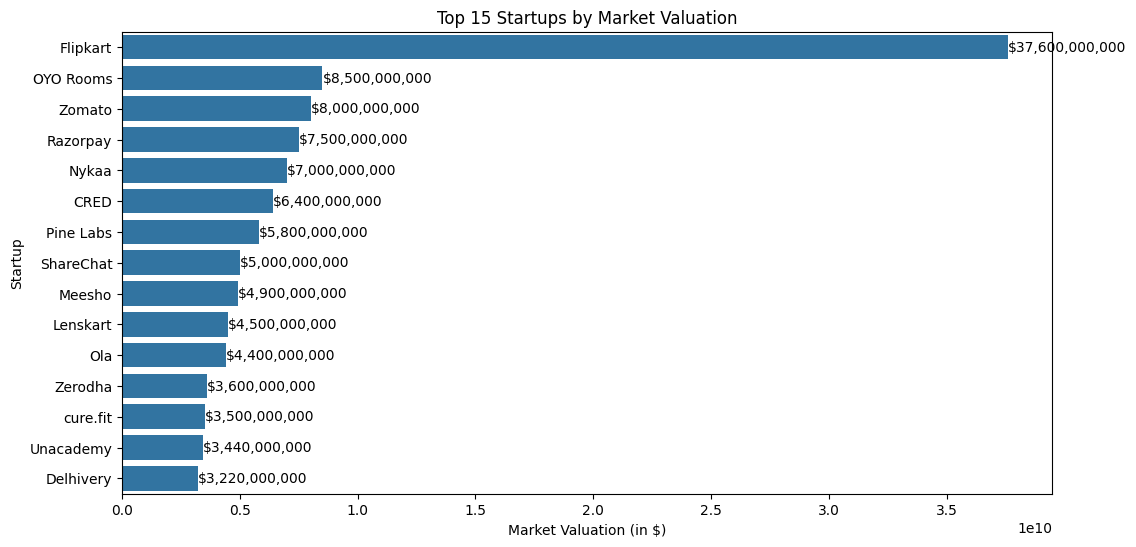

In [16]:
# Sort startups by Market Valuation and select the top 10
top_startups_by_valuation = df.sort_values(by='Market Valuation(in $)', ascending=False).head(15)

# Plotting the top startups by market valuation
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x=top_startups_by_valuation['Market Valuation(in $)'], y=top_startups_by_valuation['Name'],orient='h')
plt.title('Top 15 Startups by Market Valuation')
plt.xlabel('Market Valuation (in $)')
plt.ylabel('Startup')

# Add valuation amounts next to the bars
for index, value in enumerate(top_startups_by_valuation['Market Valuation(in $)']):
    ax1.text(value, index, f'${value:,.0f}', va='center')

plt.show()


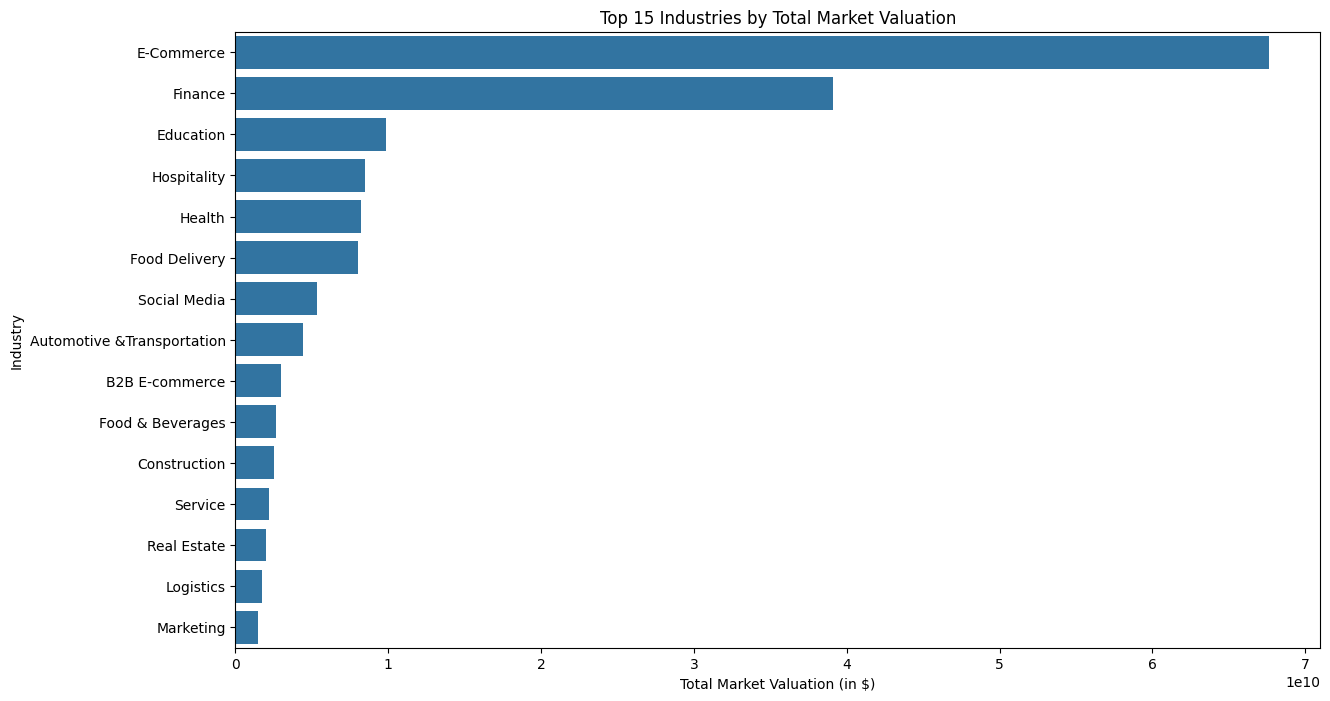

In [17]:
# Calculate total market valuation by industry and select the top 15
total_valuation_by_industry = df.groupby('Industry')['Market Valuation(in $)'].sum().sort_values(ascending=False).head(15)

# Horizontal Bar Chart
plt.figure(figsize=(14, 8))
ax2 = sns.barplot(x=total_valuation_by_industry.values, y=total_valuation_by_industry.index, orient='h')
plt.title('Top 15 Industries by Total Market Valuation')
plt.xlabel('Total Market Valuation (in $)')
plt.ylabel('Industry')

plt.show()




3.3.2 How do the number of funding rounds correlate with the total funding?

Scatter Plot: Number of Funding Rounds vs. Total Funding

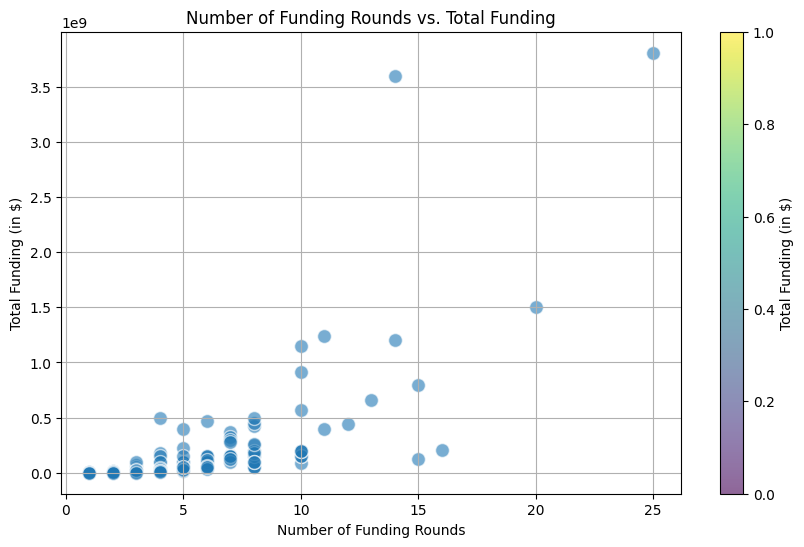

In [18]:
# Replace non-numeric entries in 'Funding Rounds' with NaN and convert to numeric
df['Funding Rounds'] = pd.to_numeric(df['Funding Rounds'], errors='coerce')

# Drop rows with NaN values in 'Funding Rounds'
df_cleaned = df.dropna(subset=['Funding Rounds'])

# Scatter Plot: Number of Funding Rounds vs. Total Funding
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['Funding Rounds'], df_cleaned['Funding(in $)'], alpha=0.6, edgecolors='w', s=100)
plt.title('Number of Funding Rounds vs. Total Funding')
plt.xlabel('Number of Funding Rounds')
plt.ylabel('Total Funding (in $)')
plt.grid(True)
plt.colorbar(label='Total Funding (in $)')
plt.show()


3.3.3 Which startups have the highest funding per employee?

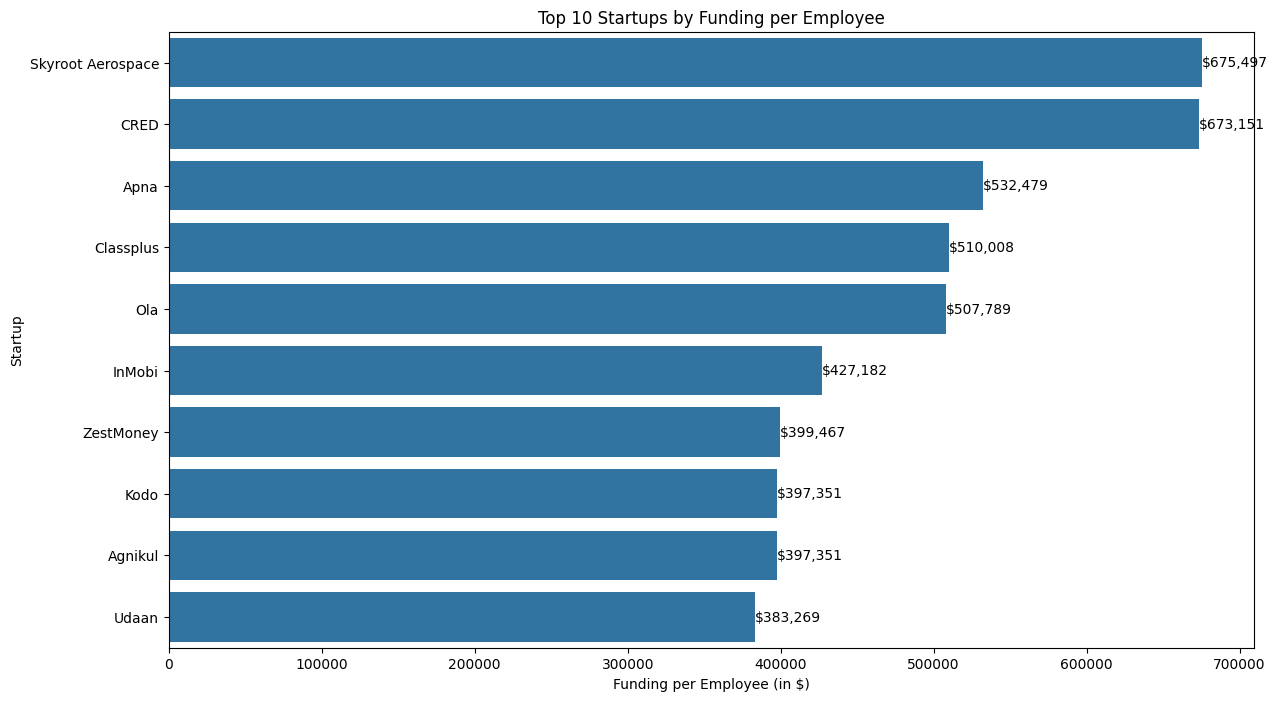

In [19]:
## Define a function to calculate the midpoint of the employee range
def calculate_employee_midpoint(employee_range):
    try:
        if '+' in employee_range:
            lower = int(employee_range.replace('+', '').split('-')[0])
            return lower
        lower, upper = map(int, employee_range.split('-'))
        return (lower + upper) / 2
    except ValueError:
        return np.nan

## Calculate the midpoint of the employee range
df['Employee Midpoint'] = df['Number of Employees'].apply(calculate_employee_midpoint)

## Calculate funding per employee
df['Funding per Employee'] = df['Funding(in $)'] / df['Employee Midpoint']

## Drop rows with NaN values in 'Funding per Employee'
df_funding_per_employee = df.dropna(subset=['Funding per Employee'])

## Sort by Funding per Employee and select the top entries
top_funding_per_employee = df_funding_per_employee.sort_values(by='Funding per Employee', ascending=False).head(10)

# Bar Chart for Top Startups by Funding per Employee
plt.figure(figsize=(14, 8))
sns.barplot(x=top_funding_per_employee['Funding per Employee'], y=top_funding_per_employee['Name'], orient='h')
plt.title('Top 10 Startups by Funding per Employee')
plt.xlabel('Funding per Employee (in $)')
plt.ylabel('Startup')

# Add funding per employee amounts next to the bars
for index, value in enumerate(top_funding_per_employee['Funding per Employee']):
    plt.text(value, index, f'${value:,.0f}', va='center')

plt.show()


3.3.4 What do can we understand about the average number of employees for companies that are valued over a billion?

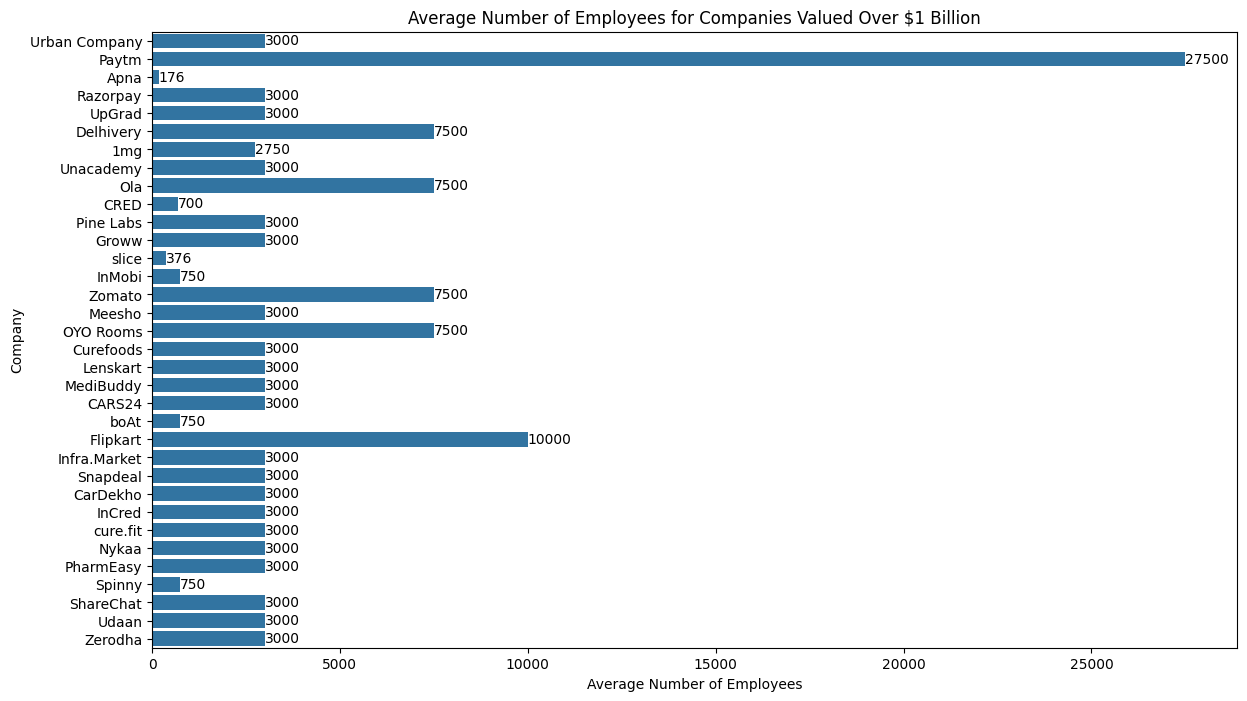

In [20]:
# Filter companies with a market valuation over a billion dollars
billion_valued_companies = df[df['Market Valuation(in $)'] > 1_000_000_000]

# Extract the relevant data: company name and employee midpoint
company_employee_data = billion_valued_companies[['Name', 'Employee Midpoint']].dropna()

# Plotting the bar chart for each company
plt.figure(figsize=(14, 8))
sns.barplot(x=company_employee_data['Employee Midpoint'], y=company_employee_data['Name'], orient='h')
plt.title('Average Number of Employees for Companies Valued Over $1 Billion')
plt.xlabel('Average Number of Employees')
plt.ylabel('Company')

# Add the average employee numbers next to the bars
for index, value in enumerate(company_employee_data['Employee Midpoint']):
    plt.text(value, index, f'{value:.0f}', va='center')

plt.show()

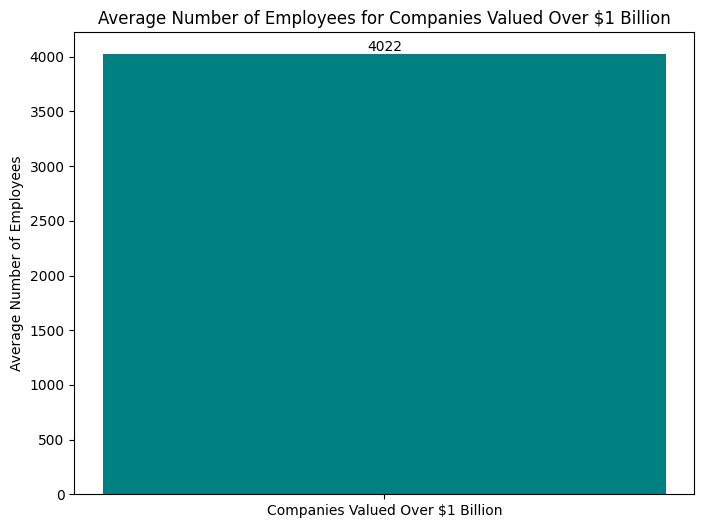

In [21]:
# Calculate the average number of employees (midpoint of the range) for these companies
average_employees = billion_valued_companies['Employee Midpoint'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Companies Valued Over $1 Billion'], [average_employees], color='teal')
plt.title('Average Number of Employees for Companies Valued Over $1 Billion')
plt.ylabel('Average Number of Employees')

# Add the average number next to the bar
plt.text(0, average_employees, f'{average_employees:.0f}', ha='center', va='bottom')

plt.show()


3.3.5 What is the number of founders for which their companies are valued over a billion?

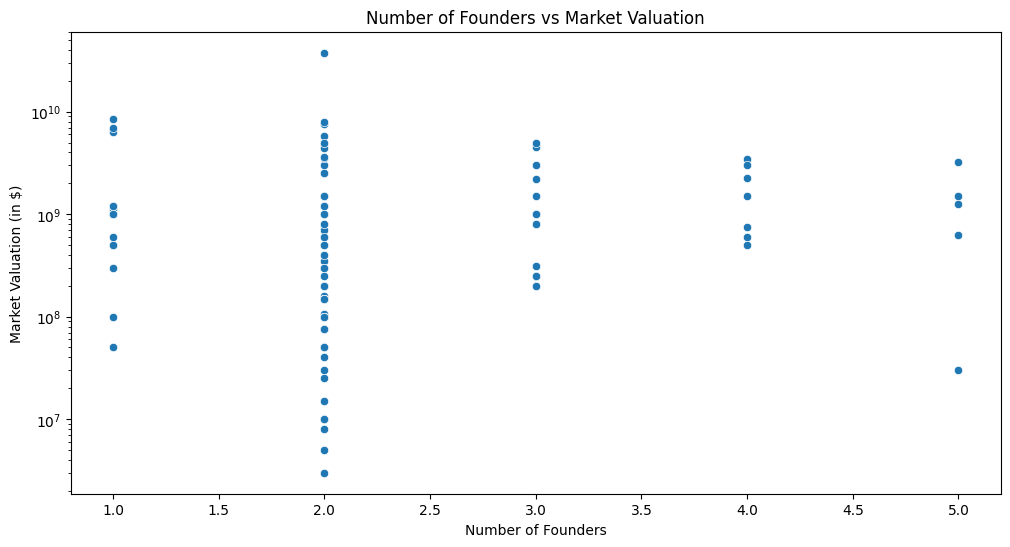

Average number of founders for billion-dollar companies: 2.30
Average number of founders for other companies: 2.16


In [22]:
# Create a function to count the number of founders
def count_founders(founders_str):
    return len(founders_str.split(','))

# Apply the function to create a new column
df['Number of Founders'] = df['Founder(s)'].apply(count_founders)

# Create a binary column for billion-dollar valuation
df['Billion Dollar Valuation'] = df['Market Valuation(in $)'] >= 1e9

# Calculate the average number of founders for billion-dollar companies and others
avg_founders_billion = df[df['Billion Dollar Valuation']]['Number of Founders'].mean()
avg_founders_others = df[~df['Billion Dollar Valuation']]['Number of Founders'].mean()

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Number of Founders', y='Market Valuation(in $)', data=df)
plt.title('Number of Founders vs Market Valuation')
plt.xlabel('Number of Founders')
plt.ylabel('Market Valuation (in $)')
plt.yscale('log')  
plt.show()

# Print average number of founders
print(f"Average number of founders for billion-dollar companies: {avg_founders_billion:.2f}")
print(f"Average number of founders for other companies: {avg_founders_others:.2f}")

## 3.4 Key Takeaways and Future Outlook

3.4.1 Dominant Trends in the Indian Startup Ecosystem

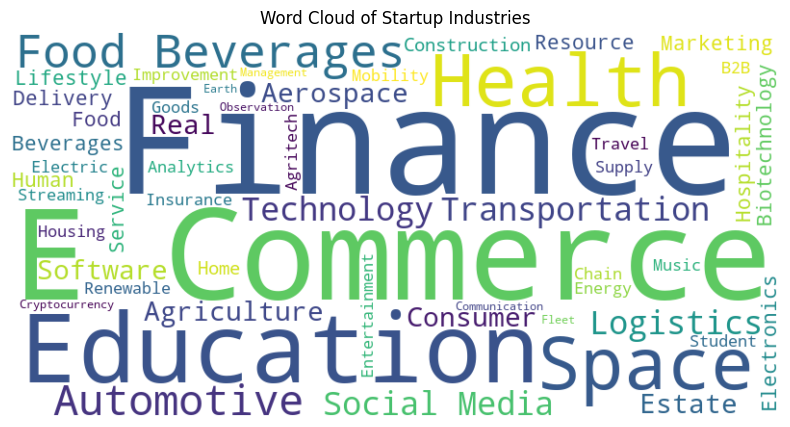

In [23]:
from wordcloud import WordCloud

# Generate a word cloud for industries
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Industry']))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Startup Industries')
plt.show()

3.4.2 Growth of startup eco-system in India

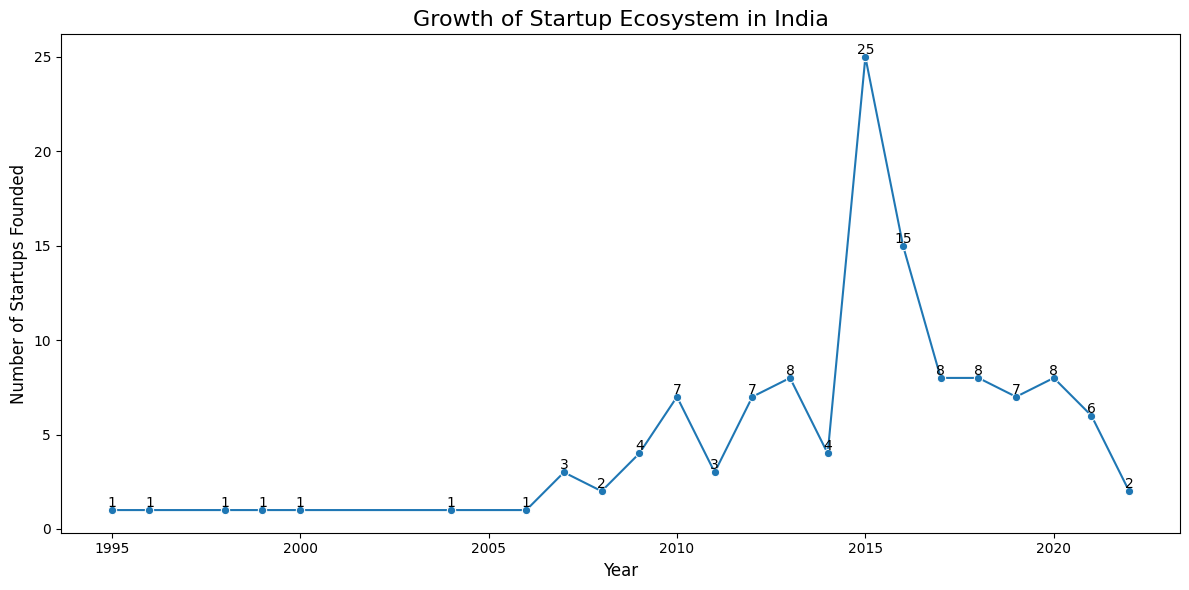

In [24]:
# Count the number of startups founded each year
startups_per_year = df['Start Year'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=startups_per_year.index, y=startups_per_year.values, marker='o')
plt.title('Growth of Startup Ecosystem in India', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Startups Founded', fontsize=12)

# Add value labels on the data points
for x, y in zip(startups_per_year.index, startups_per_year.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

## 4.Conclusion

This project provides a comprehensive analysis of India's growing startup ecosystem, leveraging data-driven insights to uncover patterns, challenges, and opportunities. Through our exploration, we've gained valuable insights into various aspects of the Indian startup landscape:

### Key Findings

1. **Geographical Distribution**: We identified the states and cities that are hotbeds for startup activity, with a notable concentration in certain regions.

2. **Industry Trends**: Our analysis revealed the most prevalent industries in the Indian startup ecosystem, highlighting sectors that are attracting significant entrepreneurial interest.

3. **Funding Patterns**: We examined the distribution of funding across different startups and industries, shedding light on which sectors are attracting the most investment.

4. **Unicorn Analysis**: Our investigation into billion-dollar valuations provided insights into the characteristics of highly successful startups.

5. **Startup Growth**: The year-wise analysis of startup formation illustrated the rapid growth and evolution of India's startup ecosystem over time.

### Implications

- The concentration of startups in certain regions suggests both opportunities for growth in less saturated areas and potential for resource competition in startup hubs.
- The diversity of industries represented in the ecosystem indicates a broad base for innovation and economic growth.
- Funding patterns reveal sectors that investors find promising, which could guide future entrepreneurs and policymakers.
- The analysis of billion-dollar startups provides valuable insights into the factors that contribute to extraordinary success in the Indian market.

### Future Directions

While this analysis provides a solid foundation for understanding India's startup ecosystem, there are several avenues for further research:

1. Deeper dive into sector-specific trends and challenges.
2. Analysis of startup survival rates and factors contributing to longevity.
3. Investigation of the impact of government policies on startup growth and success.
4. Comparative analysis with startup ecosystems in other emerging markets.

By continuing to analyze and understand these trends, we can better support the growth and success of India's vibrant startup ecosystem, fostering innovation and economic development.